
#1) Perform sentimental analysis on the Elon-musk tweets (Elon-musk.csv)

In [212]:
import pandas as pd
uncleaned_data = pd.read_csv("Elon_musk.csv",encoding = "ISO-8859-1")
uncleaned_data.head()

,Unnamed: 0,Text
0,1,@kunalb11 Im an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...


In [213]:
uncleaned_data.tail()

,Unnamed: 0,Text
1994,1995,"@flcnhvy True, it sounds so surreal, but the n..."
1995,1996,@PPathole Make sure to read ur terms &amp; con...
1996,1997,@TeslaGong @PPathole Samwise Gamgee
1997,1998,@PPathole Altho Dumb and Dumber is <U+0001F525...
1998,1999,Progress update August 28


In [214]:
uncleaned_data.isnull().sum()

Unnamed: 0    0
Text          0
dtype: int64

In [215]:

uncleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1999 entries, 0 to 1998
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  1999 non-null   int64 
 1   Text        1999 non-null   object
dtypes: int64(1), object(1)
memory usage: 31.4+ KB


In [216]:
#Load stop words
stop = pd.read_csv('stop.txt', encoding = "ISO-8859-1")
stop.head()
     
     

,a
0,a's
1,able
2,about
3,above
4,according


Data Cleaning

In [217]:
#Remove the Unnamed: 0 column because it is unnecessary
uncleaned_data = uncleaned_data.drop('Unnamed: 0', axis=1)

In [218]:

uncleaned_data.head()
     

,Text
0,@kunalb11 Im an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...


In [219]:

raw_tweets = uncleaned_data.copy()

In [220]:

#Remove all types of punctuations, numbers, special characters and lower letters
import re #regular expression
import string

def clean_text(text):
    text = re.sub(r'@[A-Z_a-z_0-9_]+', '', text)
    text = re.sub(r'https?:\/\/\S+', '', text)
    text = re.sub(r'#', '', text)     
    text = text.lower()
    return text

raw_tweets['Text'] = uncleaned_data['Text'].apply(clean_text)
raw_tweets

,Text
0,im an alien
1,ray tracing on cyberpunk with hdr is next-lev...
2,great interview!
3,doge is underestimated
4,congratulations tesla china for amazing execu...
...,...
1994,"true, it sounds so surreal, but the negative ..."
1995,make sure to read ur terms &amp; conditions b...
1996,samwise gamgee
1997,altho dumb and dumber is <u+0001f525><u+0001f...


In [221]:

def thorough_clean(text):
  text = re.sub('[^A-Za-z0-9]', ' ', text)
  return(text)

raw_tweets['Text'] = raw_tweets['Text'].apply(thorough_clean)
raw_tweets
     

,Text
0,i m an alien
1,ray tracing on cyberpunk with hdr is next lev...
2,great interview
3,doge is underestimated
4,congratulations tesla china for amazing execu...
...,...
1994,true it sounds so surreal but the negative ...
1995,make sure to read ur terms amp conditions b...
1996,samwise gamgee
1997,altho dumb and dumber is u 0001f525 u 0001f...


In [222]:

#Word frequency of raw_tweets
freq_uncleaned = pd.Series(' '.join(raw_tweets['Text']).split()).value_counts()[:20] # for top 20
freq_uncleaned

the     487
to      400
a       357
is      356
u       319
of      315
in      221
amp     219
it      194
for     194
s       173
we      172
will    165
be      157
that    149
this    140
i       137
on      129
rt      127
but     126
dtype: int64

In [223]:
#clean stop words data
stop = [x.strip() for x in stop] # remove both the leading and the trailing characters
stop = [x for x in stop if x] # removes empty strings, because they are considered in Python as False
stop[0:10]

['a']

In [224]:

final_tweets = raw_tweets.copy()

In [225]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [226]:
from nltk.corpus import stopwords

In [227]:

#removing stopwords

final_tweets['Text'] = raw_tweets['Text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

In [228]:

final_tweets

,Text
0,i m an alien
1,ray tracing on cyberpunk with hdr is next leve...
2,great interview
3,doge is underestimated
4,congratulations tesla china for amazing execut...
...,...
1994,true it sounds so surreal but the negative pro...
1995,make sure to read ur terms amp conditions befo...
1996,samwise gamgee
1997,altho dumb and dumber is u 0001f525 u 0001f525


In [229]:

#word frequency after removal of stopwords
freq_cleaned = pd.Series(' '.join(final_tweets['Text']).split()).value_counts()[:20] # for top 20
freq_cleaned

the     487
to      400
is      356
u       319
of      315
in      221
amp     219
for     194
it      194
s       173
we      172
will    165
be      157
that    149
this    140
i       137
on      129
rt      127
but     126
with    108
dtype: int64

In [230]:

# Count vectorizer also tells us the frequency and occurences of a word
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
vectorizer = CountVectorizer(min_df = 1, max_df = 0.9)
X = vectorizer.fit_transform(final_tweets["Text"])
word_freq_df = pd.DataFrame({'term': vectorizer.get_feature_names(), 'occurrences':np.asarray(X.sum(axis=0)).ravel().tolist()})
word_freq_df['frequency'] = word_freq_df['occurrences']/np.sum(word_freq_df['occurrences'])

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



In [231]:
print(word_freq_df.sort_values('occurrences',ascending = False).head())

     term  occurrences  frequency
3526  the          487   0.029033
3578   to          400   0.023846
1931   is          356   0.021223
2454   of          315   0.018779
1827   in          221   0.013175


Text(0.5, 1.07, 'Most frequently used words by elon in tweets')

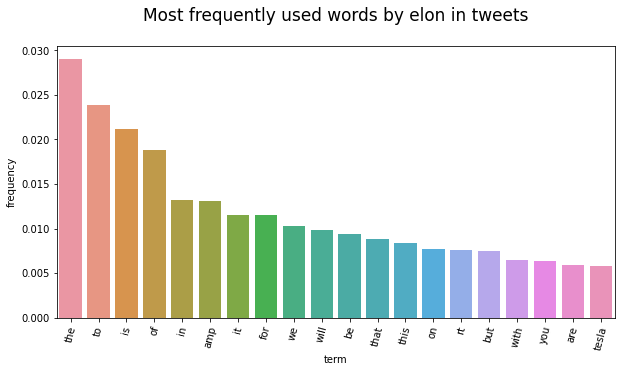

In [232]:
import seaborn as sns
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (10, 5))
plot=sns.barplot(x="term",y="frequency", data= word_freq_df.sort_values('frequency', ascending = False)[0:20:])
plot.set_xticklabels(rotation=75,labels = word_freq_df.sort_values('frequency', ascending=False).term)
plt.title("Most frequently used words by elon in tweets", y = 1.07, fontsize = 17)

TF-IDF

In [233]:
#TFIDF - Term frequency inverse Document Frequency
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english', max_features= 1000, max_df = 0.5, smooth_idf=True) #keep top 1000 words
doc_vec = vectorizer.fit_transform(final_tweets["Text"])
names_features = vectorizer.get_feature_names()
dense = doc_vec.todense()
denselist = dense.tolist()
df = pd.DataFrame(denselist, columns = names_features)
     

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



In [234]:

df.head(10)

,000,0001f1e9,0001f1ea,0001f339,0001f3b6,0001f440,0001f44c,0001f44d,0001f495,0001f4ab,...,wrong,ya,yeah,year,years,yes,yesterday,yup,zero,zone
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.402126,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.523859,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


Ngrams

In [235]:
#Bi-gram
def get_top_n2_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(2,2),  #for tri-gram, put ngram_range=(3,3)
            max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]

In [236]:
top2_words = get_top_n2_words(final_tweets["Text"], n=200) #top 200
top2_df = pd.DataFrame(top2_words)
top2_df.columns=["Bi-gram", "Freq"]
top2_df.head()

,Bi-gram,Freq
0,will be,51
1,of the,47
2,this is,36
3,in the,36
4,0001f923 0001f923,35


Text(0.5, 1.05, 'Most two words used together in tweets by elon')

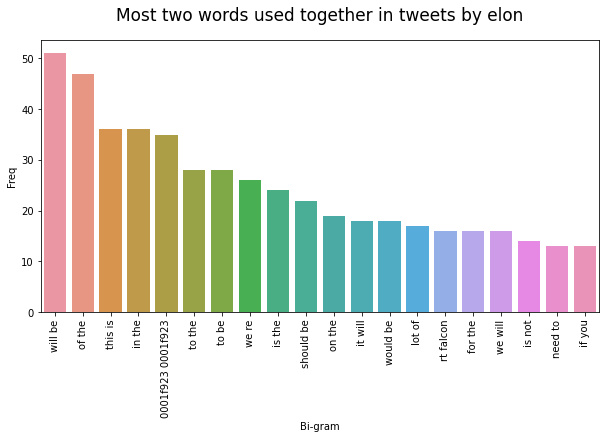

In [237]:
#Bi-gram plot
import matplotlib.pyplot as plt
import seaborn as sns
top20_bigram = top2_df.iloc[0:20,:]
fig = plt.figure(figsize = (10, 5))
plot=sns.barplot(x=top20_bigram["Bi-gram"],y=top20_bigram["Freq"])
plot.set_xticklabels(rotation=90,labels = top20_bigram["Bi-gram"])
plt.title("Most two words used together in tweets by elon", y=1.05, fontsize=17)

In [238]:
#Tri-gram
def get_top_n3_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(3,3), 
           max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]

In [239]:
top3_words = get_top_n3_words(final_tweets["Text"], n=200)
top3_df = pd.DataFrame(top3_words)
top3_df.columns=["Tri-gram", "Freq"]

In [240]:
top3_df

,Tri-gram,Freq
0,falcon first stage,9
1,it will be,8
2,rt falcon first,8
3,of course still,7
4,course still love,7
...,...,...
195,in south texas,2
196,cargo resupply mission,2
197,docks to the,2
198,on behalf of,2


Text(0.5, 1.05, 'Most three words used together in tweets by elon')

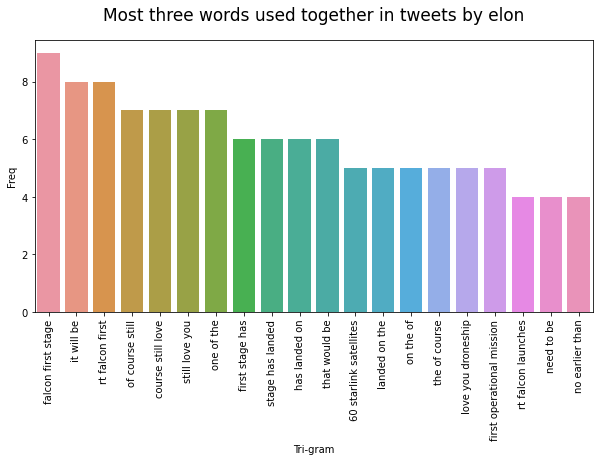

In [241]:
#Tri-gram plot
import seaborn as sns
top20_trigram = top3_df.iloc[0:20,:]
fig = plt.figure(figsize = (10, 5))
plot=sns.barplot(x=top20_trigram["Tri-gram"],y=top20_trigram["Freq"])
plot.set_xticklabels(rotation=90,labels = top20_trigram["Tri-gram"])
plt.title("Most three words used together in tweets by elon", y=1.05, fontsize=17)

In [242]:
string_Total = " ".join(final_tweets["Text"])

Text(0.5, 1.07, "Wordcloud of the words used in elon's tweets")

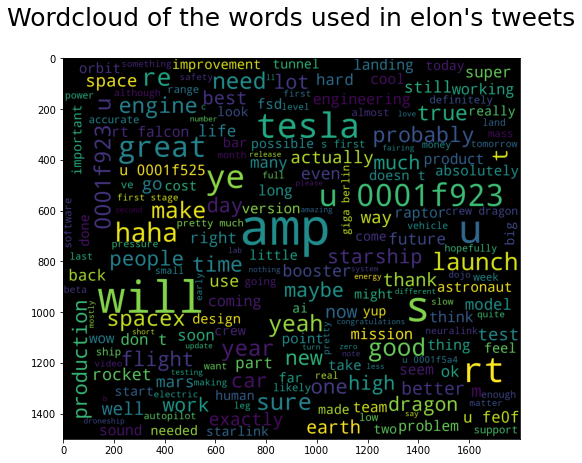

In [243]:
#wordcloud for entire corpus
fig = plt.figure(figsize = (15,7))
from wordcloud import WordCloud
wordcloud_stw = WordCloud(
                background_color= 'black',
                width = 1800,
                height = 1500, random_state = 10, max_font_size = 200
                ).generate(string_Total)
plt.imshow(wordcloud_stw)
plt.title("Wordcloud of the words used in elon's tweets", y=1.07, fontsize=25)

Named Entity Recognition

In [244]:
import string # special operations on strings
import spacy # language models

In [245]:
##Part Of Speech Tagging
nlp = spacy.load('en_core_web_sm')

one_block = final_tweets.Text.iloc[20]                                       
doc_block = nlp(one_block)
spacy.displacy.render(doc_block, style='ent', jupyter=True)

/usr/local/lib/python3.8/dist-packages/spacy/displacy/__init__.py:206: UserWarning:

[W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.



In [246]:
for token in doc_block[0:1999]:                                         #POS tagging for all the cleaned data
    print(token, token.pos_)

any DET
crypto NOUN
wallet NOUN
that PRON
won VERB
t NOUN
give VERB
you PRON
your PRON
private ADJ
keys NOUN
should AUX
be AUX
avoided VERB
at ADP
all DET
costs NOUN


In [247]:
#Filtering for nouns and verbs only
nouns_verbs = [token.text for token in doc_block if token.pos_ in ('NOUN', 'VERB')]
print("Nouns and verbs in our cleaned data:", nouns_verbs[0:1999])

Nouns and verbs in our cleaned data: ['crypto', 'wallet', 'won', 't', 'give', 'keys', 'avoided', 'costs']


In [248]:
one_block1 = uncleaned_data.Text.loc[4]       #We will use POS tagging on uncleaned data, as it gives better reults
doc_block1 = nlp(one_block1)
spacy.displacy.render(doc_block1, style='ent', jupyter=True)

In [249]:
for token in doc_block1[0:1999]:           #POS tagging for all the uncleaned data
    print(token, token.pos_)

@teslacn PROPN
Congratulations PROPN
Tesla PROPN
China PROPN
for ADP
amazing ADJ
execution NOUN
last ADJ
year NOUN
. PUNCT
Now ADV
on ADV
to ADP
the DET
next ADJ
for ADP
even ADV
more ADJ
! PUNCT
! PUNCT


In [250]:
#Filtering for nouns and verbs only
nouns_verbs = [token.text for token in doc_block1 if token.pos_ in ('NOUN', 'VERB')]
print("Nouns and verbs in our uncleaned data:", nouns_verbs[0:1999])

Nouns and verbs in our uncleaned data: ['execution', 'year']


Sentimental Analysis

In [251]:
final_tweets

,Text
0,i m an alien
1,ray tracing on cyberpunk with hdr is next leve...
2,great interview
3,doge is underestimated
4,congratulations tesla china for amazing execut...
...,...
1994,true it sounds so surreal but the negative pro...
1995,make sure to read ur terms amp conditions befo...
1996,samwise gamgee
1997,altho dumb and dumber is u 0001f525 u 0001f525


In [252]:
#create function to get subjective and polarity of tweets
from textblob import TextBlob

def get_subjectivity(text):
  return TextBlob(text).sentiment.subjectivity

def get_polarity(text):
  return TextBlob(text).sentiment.polarity

final_tweets['subjectivity'] = final_tweets['Text'].apply(get_subjectivity)
final_tweets['polarity'] = final_tweets['Text'].apply(get_polarity)
final_tweets
     

,Text,subjectivity,polarity
0,i m an alien,0.750000,-0.250000
1,ray tracing on cyberpunk with hdr is next leve...,0.000000,0.000000
2,great interview,0.750000,0.800000
3,doge is underestimated,0.000000,0.000000
4,congratulations tesla china for amazing execut...,0.366667,0.275000
...,...,...,...
1994,true it sounds so surreal but the negative pro...,0.508333,0.111111
1995,make sure to read ur terms amp conditions befo...,0.888889,0.500000
1996,samwise gamgee,0.000000,0.000000
1997,altho dumb and dumber is u 0001f525 u 0001f525,0.500000,-0.375000


In [253]:
#create a function for negative, neutral, positive analysis
def getanalysis(score):
  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  elif score > 0:
      return 'Positive'

final_tweets['Analysis'] = final_tweets['polarity'].apply(getanalysis) 
final_tweets 

,Text,subjectivity,polarity,Analysis
0,i m an alien,0.750000,-0.250000,Negative
1,ray tracing on cyberpunk with hdr is next leve...,0.000000,0.000000,Neutral
2,great interview,0.750000,0.800000,Positive
3,doge is underestimated,0.000000,0.000000,Neutral
4,congratulations tesla china for amazing execut...,0.366667,0.275000,Positive
...,...,...,...,...
1994,true it sounds so surreal but the negative pro...,0.508333,0.111111,Positive
1995,make sure to read ur terms amp conditions befo...,0.888889,0.500000,Positive
1996,samwise gamgee,0.000000,0.000000,Neutral
1997,altho dumb and dumber is u 0001f525 u 0001f525,0.500000,-0.375000,Negative


In [254]:
#print all positive tweets from most positive to least positive
positive_tweets = final_tweets[final_tweets['Analysis'] == 'Positive']
positive_tweets = positive_tweets.sort_values('polarity', ascending = False)
positive_tweets

,Text,subjectivity,polarity,Analysis
340,u 0001f3a9 the greatest gatsby u 0001f3a9,1.000000,1.000000,Positive
1409,nightcap would probably work best,0.300000,1.000000,Positive
1080,one of the best shots ever,0.300000,1.000000,Positive
781,rt rumor has it that austin chalk is geologica...,0.300000,1.000000,Positive
1818,another government stimulus package is not in ...,0.300000,1.000000,Positive
...,...,...,...,...
1581,yes we re labeling bumps amp potholes so the c...,0.396296,0.014815,Positive
150,unlike its aircraft division which is fine the...,0.450000,0.008333,Positive
304,probably less than few dozen primary decision ...,0.416667,0.008333,Positive
1073,prototypes are piece of cake but high volume p...,0.512071,0.001566,Positive


In [255]:
#print all negative tweets from most negative to least negative
negative_tweets = final_tweets[final_tweets['Analysis'] == 'Negative']
negative_tweets = negative_tweets.sort_values('polarity', ascending = True)
negative_tweets

,Text,subjectivity,polarity,Analysis
1265,it will be very insane,1.000000,-1.000000e+00,Negative
1660,rt we are going to go to the moon we are going...,1.000000,-8.000000e-01,Negative
405,the writing on cobra kai is sick u 0001f44c,0.857143,-7.142857e-01,Negative
303,his sick beats,0.857143,-7.142857e-01,Negative
1573,i want to do electric vtol supersonic sooo bad...,0.666667,-7.000000e-01,Negative
...,...,...,...,...
881,well being phased array antenna it is actually...,0.112500,-1.250000e-02,Negative
613,to be clear this was just an xpeng problem oth...,0.379167,-1.250000e-02,Negative
1416,giant gap between experimental medical device ...,0.566667,-4.166667e-03,Negative
746,would be great to hear from people who know lo...,0.650000,-1.850372e-17,Negative


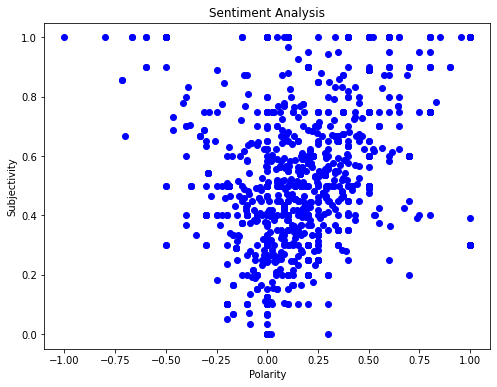

In [256]:
#plot polarity and subjectivity
plt.figure(figsize=(8,6))
for i in range(0, final_tweets.shape[0]):
  plt.scatter(final_tweets.polarity[i], final_tweets.subjectivity[i], color = 'blue')

plt.title("Sentiment Analysis")
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

Majority of points lie from right of 0.0 of x-axis(Polarity).

In [257]:
#Get % of positive, negative, neutral tweets
print("% of positive tweets:", round((positive_tweets.shape[0]/final_tweets.shape[0])*100, 1))
print("% of negative tweets:", round((negative_tweets.shape[0]/final_tweets.shape[0])*100, 1))

% of positive tweets: 44.7
% of negative tweets: 11.1


In [258]:
#Get % of positive, negative, neutral tweets
print("% of positive tweets:", round((positive_tweets.shape[0]/final_tweets.shape[0])*100, 1))
print("% of negative tweets:", round((negative_tweets.shape[0]/final_tweets.shape[0])*100, 1))

% of positive tweets: 44.7
% of negative tweets: 11.1


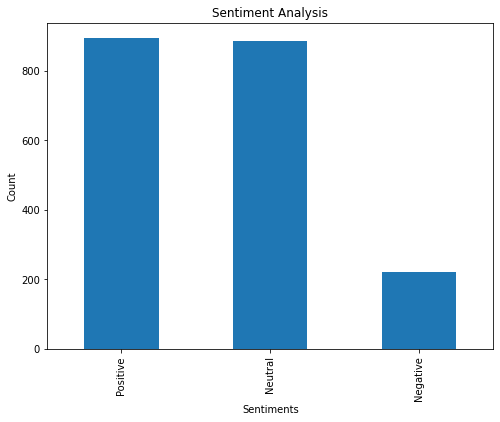

In [259]:
plt.figure(figsize=(8,6))
final_tweets['Analysis'].value_counts().plot(kind='bar')
plt.title("Sentiment Analysis")
plt.xlabel('Sentiments')
plt.ylabel('Count')
plt.show()

#Problem Statement
Perform sentimental analysis:
1) Extract reviews of any product from ecommerce website like amazon
2) Perform emotion mining

In [260]:
import pandas as pd
import requests
from tqdm import tqdm_notebook
from bs4 import BeautifulSoup

In [261]:
headers = {
    'authority': 'www.amazon.in',
    'accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9',
    'accept-language': 'en-US,en;q=0.9',
    'cache-control': 'max-age=0',
    # Requests sorts cookies= alphabetically
    # 'cookie': 'session-id=259-3113978-6678618; i18n-prefs=INR; ubid-acbin=260-8554202-6973909; lc-acbin=en_IN; csm-hit=tb:BS866TA0AKH6X86N924E+sa-7XYTQAXQHJP5ADH88228-DY27HYE0CK5V9FW24GBD|1656009294944&t:1656009294945&adb:adblk_yes; session-token=Z1j175VoYxPr2Un/9ciL3Q6lKw+QtLYYIwSQ+GLxjT06952u8vOZromD4WcFE0bs+yrUyLPy8HmIn7mTjUt8qsx3n0meC7yWKFqqwDEm5iecYedklsrNwmDrQOiaMH9lpacbdB8kgUk5IbZdg1VyhrdnY4OZrk6r350ARDEXJExuu2GZr0sV4fpbwUes/V9fDrfASeMQhVEEzmEAAHWN2g==; session-id-time=2082758401l',
    'device-memory': '8',
    'downlink': '10',
    'dpr': '0.8',
    'ect': '4g',
    'referer': 'https://www.amazon.in/OnePlus-Nord-Black-128GB-Storage/dp/B09WQY65HN/ref=sr_1_4?crid=1D99WHM86WX80&keywords=oneplus&qid=1656009113&sprefix=onep%2Caps%2C315&sr=8-4&th=1',
    'rtt': '0',
    'sec-ch-device-memory': '8',
    'sec-ch-dpr': '0.8',
    'sec-ch-ua': '" Not A;Brand";v="99", "Chromium";v="102", "Google Chrome";v="102"',
    'sec-ch-ua-mobile': '?0',
    'sec-ch-ua-platform': '"Windows"',
    'sec-ch-viewport-width': '2400',
    'sec-fetch-dest': 'document',
    'sec-fetch-mode': 'navigate',
    'sec-fetch-site': 'same-origin',
    'sec-fetch-user': '?1',
    'service-worker-navigation-preload': 'true',
    'upgrade-insecure-requests': '1',
    'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/102.0.0.0 Safari/537.36',
    'viewport-width': '2400',
}

A. Looping through multiple pages
One of the easiest methods to scrape multiple pages is to modify the base URL to accept a page variable that increments as needed.

Try for yourself! See how the URL changes as you go through multiple pages.

For Amazon product reviews, the only thing that seems to change is the number indicating which page it is.

Okay, now let’s put this to work in a function:

In [262]:
def get_soup(url):
    #r = requests.get('http://localhost:8050/render.html', 
    # Run this instead if you haven't setup Splash & Docker
    r = requests.get(url, headers=headers,
    params={'url': url, 'wait': 2})
    soup = BeautifulSoup(r.text, 'html.parser')
    return soup

In [263]:
# Initialize list to store reviews data later on
reviewlist = []

# Function 2: look for web-tags in our soup, then append our data to reviewList
def get_reviews(soup):
    reviews = soup.find_all('div', {'data-hook': 'review'})
    try:
        for item in reviews:
            review = {
            'product': soup.title.text.replace('Amazon.in:Customer reviews: ', '').strip(),    
            'date': item.find('span', {'data-hook': 'review-date'}).text.replace('Reviewed in India on', '').strip(),
            'title': item.find('a', {'data-hook': 'review-title'}).text.strip(),
            'rating':  float(item.find('i', {'data-hook': 'review-star-rating'}).text.replace('out of 5 stars', '').strip()),
            'body': item.find('span', {'data-hook': 'review-body'}).text.strip(),
            }
            reviewlist.append(review)
    except:
        pass

In [264]:
# Initialize list to store reviews data later on
reviewlist = []

# Function 2: look for web-tags in our soup, then append our data to reviewList
def get_reviews(soup):
    reviews = soup.find_all('div', {'data-hook': 'review'})
    try:
        for item in reviews:
            review = {
            'Rating':  float(item.find('i', {'data-hook': 'review-star-rating'}).text.replace('out of 5 stars', '').strip()),
            'Title': item.find('a', {'data-hook': 'review-title'}).text.strip(),
            'Review': item.find('span', {'data-hook': 'review-body'}).text.strip(),
            'Review_Date': item.find('span', {'data-hook': 'review-date'}).text.replace('Reviewed in India on', '').strip(),
            }
            reviewlist.append(review)
    except:
        pass

We can even add in a a stop condition. For this one, we can tell Python to look for a greyed out “Next Page” button. To identify this element, use the element inspector.
Add this to the bottom of the function above.

In [265]:
# loop through 1:x many pages, or until the css selector found only on the last page is found (when the next page button is greyed)
for x in tqdm_notebook(range(1,1000)):
    soup = get_soup(f'https://www.amazon.in/OnePlus-Nord-Mirror-128GB-Storage/product-reviews/B09RG132Q5/\
    ref=cm_cr_arp_d_paging_btm_next_2?ie=UTF8&reviewerType=all_reviews&pageNumber={x}')
    #print(f'Getting page: {x}')
    get_reviews(soup)
    #print(len(reviewlist))
    if not soup.find('li', {'class': 'a-disabled a-last'}):
        pass
    else:
        break

  0%|          | 0/999 [00:00<?, ?it/s]

In [266]:
# Save results to a dataframe, then export as CSV
df = pd.DataFrame(reviewlist)
df

,Rating,Title,Review,Review_Date
0,4.0,This is a branded budget phone 📱,This is definitely a budget branded phone 📱 af...,5 January 2023
1,4.0,My Review on OnePlus Mobile,Pros......I am using OnePlus from last few mon...,28 December 2022
2,4.0,Good phone-could have been better !,I've purchased the 6GB version of this phone w...,19 December 2022
3,4.0,OnePlus Nord CE2 lite review,Good at this price. Using hand set will feel u...,5 January 2023
4,4.0,This mobile is totally as same as i was expecting,Waw this is good mobile is under 20K. I have p...,1 January 2023
...,...,...,...,...
3235,4.0,Low Speaker Volume,The speaker volume is not upto the mark,5 April 2022
3236,5.0,Nice product,Good,26 August 2022
3237,4.0,Everything is fine but camera disappoints.,Need to work on camera quality in coming updates,4 April 2022
3238,5.0,Light weight,Good,23 August 2022


In [267]:
df.to_csv("Amazon_Reviews_Oneplus_Nord_CE2.csv")

In [268]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import re
import time
import string
import warnings
import spacy
from tqdm.notebook import tqdm_notebook

# for all NLP related operations on text
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import *
from nltk.classify import NaiveBayesClassifier
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud, STOPWORDS
from plotly import graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff
from collections import Counter

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score, classification_report
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

# To identify the sentiment of text
from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer
from textblob.np_extractors import ConllExtractor

from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.pipeline import make_pipeline
from nltk.tokenize import RegexpTokenizer

# ignoring all the warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

# downloading stopwords corpus
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('vader_lexicon')
nltk.download('averaged_perceptron_tagger')
nltk.download('movie_reviews')
nltk.download('punkt')
nltk.download('conll2000')
nltk.download('brown')
stopwords = set(stopwords.words("english"))

# for showing all the plots inline
%matplotlib inline

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Package conll2000 is already up-to-date!
[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Package brown is alr

In [269]:
# load the dataset
reviews=pd.read_csv('Amazon_Reviews_Oneplus_Nord_CE2.csv')
reviews.drop(['Unnamed: 0'],inplace=True,axis=1)
reviews

,Rating,Title,Review,Review_Date
0,4.0,This is a branded budget phone 📱,This is definitely a budget branded phone 📱 af...,5 January 2023
1,4.0,My Review on OnePlus Mobile,Pros......I am using OnePlus from last few mon...,28 December 2022
2,4.0,Good phone-could have been better !,I've purchased the 6GB version of this phone w...,19 December 2022
3,4.0,OnePlus Nord CE2 lite review,Good at this price. Using hand set will feel u...,5 January 2023
4,4.0,This mobile is totally as same as i was expecting,Waw this is good mobile is under 20K. I have p...,1 January 2023
...,...,...,...,...
3235,4.0,Low Speaker Volume,The speaker volume is not upto the mark,5 April 2022
3236,5.0,Nice product,Good,26 August 2022
3237,4.0,Everything is fine but camera disappoints.,Need to work on camera quality in coming updates,4 April 2022
3238,5.0,Light weight,Good,23 August 2022


 Data Exploration

In [270]:
reviews.Rating.describe()

count    3240.000000
mean        4.251852
std         0.755036
min         1.000000
25%         4.000000
50%         4.000000
75%         5.000000
max         5.000000
Name: Rating, dtype: float64

In [271]:
reviews['word_count'] = reviews['Review'].apply(lambda x: len(str(x).split(" ")))
reviews[['Review','word_count']].head()

,Review,word_count
0,This is definitely a budget branded phone 📱 af...,152
1,Pros......I am using OnePlus from last few mon...,217
2,I've purchased the 6GB version of this phone w...,299
3,Good at this price. Using hand set will feel u...,26
4,Waw this is good mobile is under 20K. I have p...,45


Number of characters

In [272]:
reviews['char_count'] = reviews['Review'].str.len() ## this also includes spaces
reviews[['Review','char_count']].head()

,Review,char_count
0,This is definitely a budget branded phone 📱 af...,807.0
1,Pros......I am using OnePlus from last few mon...,1281.0
2,I've purchased the 6GB version of this phone w...,1715.0
3,Good at this price. Using hand set will feel u...,144.0
4,Waw this is good mobile is under 20K. I have p...,239.0


Average Word Length

In [273]:
def avg_word(sentence):
  words = str(sentence).split()
  return (sum(len(word) for word in words)/len(words))

reviews['avg_word'] = reviews['Review'].apply(lambda x: avg_word(x))
reviews[['Review','avg_word']].head()

,Review,avg_word
0,This is definitely a budget branded phone 📱 af...,4.344371
1,Pros......I am using OnePlus from last few mon...,4.907834
2,I've purchased the 6GB version of this phone w...,4.755034
3,Good at this price. Using hand set will feel u...,4.576923
4,Waw this is good mobile is under 20K. I have p...,4.333333


Number of stopwords

In [274]:
from nltk.corpus import stopwords
stop = stopwords.words('english')

reviews['stopwords'] = reviews['Review'].apply(lambda x: len([x for x in str(x).split() if x in stop]))
reviews[['Review','stopwords']].head()

,Review,stopwords
0,This is definitely a budget branded phone 📱 af...,53
1,Pros......I am using OnePlus from last few mon...,86
2,I've purchased the 6GB version of this phone w...,128
3,Good at this price. Using hand set will feel u...,9
4,Waw this is good mobile is under 20K. I have p...,19


Number of special characters

In [275]:
reviews['hashtags'] = reviews['Review'].apply(lambda x: len([x for x in str(x).split() if x.startswith('#')]))
reviews[['Review','hashtags']].head()

,Review,hashtags
0,This is definitely a budget branded phone 📱 af...,0
1,Pros......I am using OnePlus from last few mon...,0
2,I've purchased the 6GB version of this phone w...,0
3,Good at this price. Using hand set will feel u...,0
4,Waw this is good mobile is under 20K. I have p...,0


Number of numerics

In [276]:
reviews['numerics'] = reviews['Review'].apply(lambda x: len([x for x in str(x).split() if x.isdigit()]))
reviews[['Review','numerics']].head()

,Review,numerics
0,This is definitely a budget branded phone 📱 af...,7
1,Pros......I am using OnePlus from last few mon...,0
2,I've purchased the 6GB version of this phone w...,2
3,Good at this price. Using hand set will feel u...,0
4,Waw this is good mobile is under 20K. I have p...,0


Number of Uppercase words

In [277]:
reviews['upper'] = reviews['Review'].apply(lambda x: len([x for x in str(x).split() if x.isupper()]))
reviews[['Review','upper']].head()

,Review,upper
0,This is definitely a budget branded phone 📱 af...,3
1,Pros......I am using OnePlus from last few mon...,9
2,I've purchased the 6GB version of this phone w...,4
3,Good at this price. Using hand set will feel u...,0
4,Waw this is good mobile is under 20K. I have p...,3


In [278]:
reviews.drop(['numerics','hashtags','stopwords','avg_word','char_count','word_count','upper'],axis=1,inplace=True)

Spelling correction

In [279]:
from textblob import TextBlob
reviews['Review'][:5].apply(lambda x: str(TextBlob(x).correct()))

0    His is definitely a budget branded phone 📱 aft...
1    Gros......I am using OnePlus from last few mon...
2    I've purchased the 6GB version of this phone w...
3    Good at this price. Using hand set will feel u...
4    Saw this is good mobile is under 20K. I have p...
Name: Review, dtype: object

Feature Engineering

In [280]:
print(reviews['Review_Date'].str.split(' ').str[0],'\n',
      reviews['Review_Date'].str.split(' ').str[1],'\n',
      reviews['Review_Date'].str.split(' ').str[2])

0        5
1       28
2       19
3        5
4        1
        ..
3235     5
3236    26
3237     4
3238    23
3239    25
Name: Review_Date, Length: 3240, dtype: object 
 0        January
1       December
2       December
3        January
4        January
          ...   
3235       April
3236      August
3237       April
3238      August
3239        July
Name: Review_Date, Length: 3240, dtype: object 
 0       2023
1       2022
2       2022
3       2023
4       2023
        ... 
3235    2022
3236    2022
3237    2022
3238    2022
3239    2022
Name: Review_Date, Length: 3240, dtype: object


Spliting Review Date into Three seperate Columns (Year,Month,Day)

In [281]:
df=reviews.copy()
df['Date']=df['Review_Date'].str.split(' ').str[0]
df['Month']=df['Review_Date'].str.split(' ').str[1]
df['Year']=df['Review_Date'].str.split(' ').str[2]
df[['Date','Month','Year']]

,Date,Month,Year
0,5,January,2023
1,28,December,2022
2,19,December,2022
3,5,January,2023
4,1,January,2023
...,...,...,...
3235,5,April,2022
3236,26,August,2022
3237,4,April,2022
3238,23,August,2022


In [282]:
df.Month.value_counts()

in           1530
November      285
October       281
September     279
August        241
December      143
July          135
June          109
May           106
April          46
January        43
March          33
February        9
Name: Month, dtype: int64

Change 'month' from words to numbers for easier analysis

In [283]:
order={'Month':{'February':2,'March':3,'April':4,'May':5,'June':6}}
df1= df.copy()
df1=df1.replace(order)
df1[['Month']]

,Month
0,January
1,December
2,December
3,January
4,January
...,...
3235,4
3236,August
3237,4
3238,August


In [284]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3240 entries, 0 to 3239
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Rating       3240 non-null   float64
 1   Title        3240 non-null   object 
 2   Review       3095 non-null   object 
 3   Review_Date  3240 non-null   object 
 4   Date         3240 non-null   object 
 5   Month        3240 non-null   object 
 6   Year         3240 non-null   object 
dtypes: float64(1), object(6)
memory usage: 177.3+ KB


In [285]:
def avg_rating(self):
        result = Review.objects.filter(subject=self).aggregate(avg_rating=Avg('overall'))
        return result


Dropping the Original Columns after splitting the data

In [286]:
df1.drop('Review_Date',axis=1, inplace=True)
df1.head()

,Rating,Title,Review,Date,Month,Year
0,4.0,This is a branded budget phone 📱,This is definitely a budget branded phone 📱 af...,5,January,2023
1,4.0,My Review on OnePlus Mobile,Pros......I am using OnePlus from last few mon...,28,December,2022
2,4.0,Good phone-could have been better !,I've purchased the 6GB version of this phone w...,19,December,2022
3,4.0,OnePlus Nord CE2 lite review,Good at this price. Using hand set will feel u...,5,January,2023
4,4.0,This mobile is totally as same as i was expecting,Waw this is good mobile is under 20K. I have p...,1,January,2023


In [287]:

df

,Rating,Title,Review,Review_Date,Date,Month,Year
0,4.0,This is a branded budget phone 📱,This is definitely a budget branded phone 📱 af...,5 January 2023,5,January,2023
1,4.0,My Review on OnePlus Mobile,Pros......I am using OnePlus from last few mon...,28 December 2022,28,December,2022
2,4.0,Good phone-could have been better !,I've purchased the 6GB version of this phone w...,19 December 2022,19,December,2022
3,4.0,OnePlus Nord CE2 lite review,Good at this price. Using hand set will feel u...,5 January 2023,5,January,2023
4,4.0,This mobile is totally as same as i was expecting,Waw this is good mobile is under 20K. I have p...,1 January 2023,1,January,2023
...,...,...,...,...,...,...,...
3235,4.0,Low Speaker Volume,The speaker volume is not upto the mark,5 April 2022,5,April,2022
3236,5.0,Nice product,Good,26 August 2022,26,August,2022
3237,4.0,Everything is fine but camera disappoints.,Need to work on camera quality in coming updates,4 April 2022,4,April,2022
3238,5.0,Light weight,Good,23 August 2022,23,August,2022


##Data Visualization
date versus review count

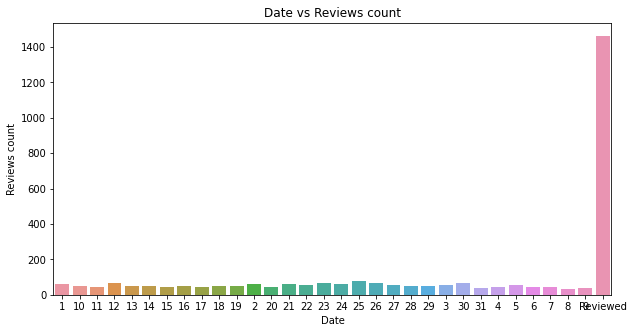

In [288]:
#Creating a dataframe
dayreview = pd.DataFrame(df.groupby('Date')['Review'].count()).reset_index()
def avg_rating(self):
        result = Review.objects.filter(subject=self).aggregate(avg_rating=Avg('overall'))
        return result

dayreview.sort_values(by = ['Date'])

#Plotting the graph
plt.figure(figsize=(10,5))
sns.barplot(x = "Date", y = "Review", data = dayreview)
plt.title('Date vs Reviews count')
plt.xlabel('Date')
plt.ylabel('Reviews count')
plt.show()

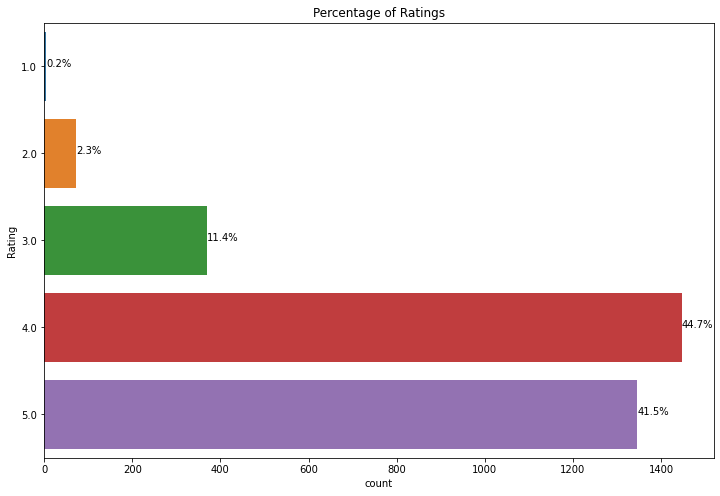

In [289]:
plt.figure(figsize=(12,8))
plt.title('Percentage of Ratings')
ax = sns.countplot(y = 'Rating', data = reviews)
total = len(reviews)
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

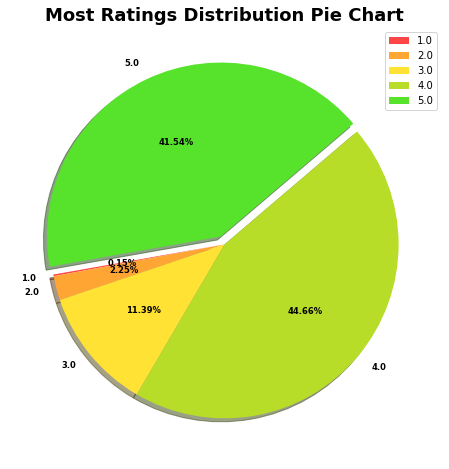

In [290]:
plt.figure(figsize = (12,8))
plt.pie(df['Rating'].value_counts().sort_index(),
       labels=df['Rating'].value_counts().sort_index().index,
       explode = [0.00,0.0,0.0,0.0,0.05],
       autopct= '%.2f%%',
        colors = ["#ff4545", "#ffa534",'#ffe234','#b7dd29','#57e32c'],
       shadow= True,
       startangle= 190,
       textprops = {'size':'small',
                   'fontweight':'bold',
                    'rotation':'0',
                   'color':'black'})
plt.legend(loc= 'upper right')
plt.title("Most Ratings Distribution Pie Chart", fontsize = 18, fontweight = 'bold')
plt.show()

BasicText Preprocessing

A. For Sentiment Analysis

keeping the DataFrame intact and each tweets separate from each other

In [291]:
data = df[['Review']]
data

,Review
0,This is definitely a budget branded phone 📱 af...
1,Pros......I am using OnePlus from last few mon...
2,I've purchased the 6GB version of this phone w...
3,Good at this price. Using hand set will feel u...
4,Waw this is good mobile is under 20K. I have p...
...,...
3235,The speaker volume is not upto the mark
3236,Good
3237,Need to work on camera quality in coming updates
3238,Good


In [292]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
data['Review'] = data['Review'].apply(lambda x: " ".join(x.lower() for x in str(x).split() \
                                    if x not in stop_words))

In [293]:
data

,Review
0,this definitely budget branded phone 📱 1 month...
1,pros......i using oneplus last months review o...
2,i've purchased 6gb version phone comes extenda...
3,good price. using hand set feel us using oppo ...
4,waw good mobile 20k. i purchased fully satisfi...
...,...
3235,the speaker volume upto mark
3236,good
3237,need work camera quality coming updates
3238,good


In [294]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [295]:
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package basque_grammars is already up-to-date!
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    |   Package bcp47 is already up-to-dat

True

In [296]:
lemmatizer = WordNetLemmatizer()
# Removing punctuation, making str to lower, applying Lemmatizer, Removing Stop words
corpus=[]
for i in tqdm_notebook(range(0, len(data))):
    cleaned= re.sub('[^a-zA-Z]', " ", data["Review"][i])
    cleaned= cleaned.lower()
    cleaned = cleaned.split()
    cleaned= [lemmatizer.lemmatize(word) for word in cleaned if word not in stopwords.words("english")]
    cleaned= ' '.join(cleaned)
    corpus.append(cleaned)

  0%|          | 0/3240 [00:00<?, ?it/s]

In [297]:
#Saving cleaned data to compare with original data, to ckeck amount of information lost
dataframe = pd.DataFrame({"Clean_Reviews": corpus,"Uncleaned_Reviews": df.Review})
dataframe.head()

,Clean_Reviews,Uncleaned_Reviews
0,definitely budget branded phone month day use ...,This is definitely a budget branded phone 📱 af...
1,pro using oneplus last month review one plus p...,Pros......I am using OnePlus from last few mon...
2,purchased gb version phone come extendable gb ...,I've purchased the 6GB version of this phone w...
3,good price using hand set feel u using oppo re...,Good at this price. Using hand set will feel u...
4,waw good mobile k purchased fully satisfied fe...,Waw this is good mobile is under 20K. I have p...


 Text Pre-processing Techniques
A. Pre-processing 'Key Words'
a. Removing '@names'

In [298]:
def remove_pattern(text, pattern_regex):
    r = re.findall(pattern_regex, text)
    for i in r:
        text = re.sub(i, '', text)
    
    return text 

In [299]:
# We are keeping cleaned tweets in a new column called 'tidy_tweets'
dataframe['Clean_Reviews'] = np.vectorize(remove_pattern)(dataframe['Clean_Reviews'], "@[\w]*")
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,definitely budget branded phone month day use ...,This is definitely a budget branded phone 📱 af...
1,pro using oneplus last month review one plus p...,Pros......I am using OnePlus from last few mon...
2,purchased gb version phone come extendable gb ...,I've purchased the 6GB version of this phone w...
3,good price using hand set feel u using oppo re...,Good at this price. Using hand set will feel u...
4,waw good mobile k purchased fully satisfied fe...,Waw this is good mobile is under 20K. I have p...
5,good feature low price segment,Good features in low price segments.
6,goood,It's goood
7,great product oneplus price point camera quali...,It was great product by oneplus in this price ...
8,good phone,Good phone
9,batter,Batter


Removing links (http | https)

In [300]:
cleaned_reviews = []

for index, row in dataframe.iterrows():
    # Here we are filtering out all the words that contains link
    words_without_links = [word for word in row.Clean_Reviews.split() if 'http' not in word]
    cleaned_reviews.append(' '.join(words_without_links))

dataframe['Clean_Reviews'] = cleaned_reviews
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,definitely budget branded phone month day use ...,This is definitely a budget branded phone 📱 af...
1,pro using oneplus last month review one plus p...,Pros......I am using OnePlus from last few mon...
2,purchased gb version phone come extendable gb ...,I've purchased the 6GB version of this phone w...
3,good price using hand set feel u using oppo re...,Good at this price. Using hand set will feel u...
4,waw good mobile k purchased fully satisfied fe...,Waw this is good mobile is under 20K. I have p...
5,good feature low price segment,Good features in low price segments.
6,goood,It's goood
7,great product oneplus price point camera quali...,It was great product by oneplus in this price ...
8,good phone,Good phone
9,batter,Batter


Removing Review with empty text

In [301]:
dataframe = dataframe[dataframe['Clean_Reviews']!='']
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,definitely budget branded phone month day use ...,This is definitely a budget branded phone 📱 af...
1,pro using oneplus last month review one plus p...,Pros......I am using OnePlus from last few mon...
2,purchased gb version phone come extendable gb ...,I've purchased the 6GB version of this phone w...
3,good price using hand set feel u using oppo re...,Good at this price. Using hand set will feel u...
4,waw good mobile k purchased fully satisfied fe...,Waw this is good mobile is under 20K. I have p...
5,good feature low price segment,Good features in low price segments.
6,goood,It's goood
7,great product oneplus price point camera quali...,It was great product by oneplus in this price ...
8,good phone,Good phone
9,batter,Batter


Dropping duplicate rows

In [302]:
dataframe.drop_duplicates(subset=['Clean_Reviews'], keep=False)
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,definitely budget branded phone month day use ...,This is definitely a budget branded phone 📱 af...
1,pro using oneplus last month review one plus p...,Pros......I am using OnePlus from last few mon...
2,purchased gb version phone come extendable gb ...,I've purchased the 6GB version of this phone w...
3,good price using hand set feel u using oppo re...,Good at this price. Using hand set will feel u...
4,waw good mobile k purchased fully satisfied fe...,Waw this is good mobile is under 20K. I have p...
5,good feature low price segment,Good features in low price segments.
6,goood,It's goood
7,great product oneplus price point camera quali...,It was great product by oneplus in this price ...
8,good phone,Good phone
9,batter,Batter


Resetting index

It seems that our index needs to be reset, since after removal of some rows, some index values are missing, which may cause problem in future operations.

In [303]:
dataframe = dataframe.reset_index(drop=True)
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,definitely budget branded phone month day use ...,This is definitely a budget branded phone 📱 af...
1,pro using oneplus last month review one plus p...,Pros......I am using OnePlus from last few mon...
2,purchased gb version phone come extendable gb ...,I've purchased the 6GB version of this phone w...
3,good price using hand set feel u using oppo re...,Good at this price. Using hand set will feel u...
4,waw good mobile k purchased fully satisfied fe...,Waw this is good mobile is under 20K. I have p...
5,good feature low price segment,Good features in low price segments.
6,goood,It's goood
7,great product oneplus price point camera quali...,It was great product by oneplus in this price ...
8,good phone,Good phone
9,batter,Batter


##Removing Punctuations, Numbers and Special characters

This step should not be followed if we also want to do sentiment analysis on key phrases as well, because semantic meaning in a sentence needs to be present. So here we will create one additional column 'absolute_tidy_tweets' which will contain absolute tidy words which can be further used for sentiment analysis on key words.

In [304]:
def clean_text(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

In [305]:
dataframe['Clean_Reviews'] = dataframe['Clean_Reviews'].apply(lambda x: clean_text(x))
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,definitely budget branded phone month day use ...,This is definitely a budget branded phone 📱 af...
1,pro using oneplus last month review one plus p...,Pros......I am using OnePlus from last few mon...
2,purchased gb version phone come extendable gb ...,I've purchased the 6GB version of this phone w...
3,good price using hand set feel u using oppo re...,Good at this price. Using hand set will feel u...
4,waw good mobile k purchased fully satisfied fe...,Waw this is good mobile is under 20K. I have p...
5,good feature low price segment,Good features in low price segments.
6,goood,It's goood
7,great product oneplus price point camera quali...,It was great product by oneplus in this price ...
8,good phone,Good phone
9,batter,Batter


Function to remove emoji

In [306]:
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

In [307]:
dataframe['Clean_Reviews']=dataframe['Clean_Reviews'].apply(lambda x: remove_emoji(x))
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,definitely budget branded phone month day use ...,This is definitely a budget branded phone 📱 af...
1,pro using oneplus last month review one plus p...,Pros......I am using OnePlus from last few mon...
2,purchased gb version phone come extendable gb ...,I've purchased the 6GB version of this phone w...
3,good price using hand set feel u using oppo re...,Good at this price. Using hand set will feel u...
4,waw good mobile k purchased fully satisfied fe...,Waw this is good mobile is under 20K. I have p...
5,good feature low price segment,Good features in low price segments.
6,goood,It's goood
7,great product oneplus price point camera quali...,It was great product by oneplus in this price ...
8,good phone,Good phone
9,batter,Batter


In [308]:
dataframe['tokenized_tweets'] = dataframe['Clean_Reviews'].apply(lambda x: nltk.word_tokenize(x))
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews,tokenized_tweets
0,definitely budget branded phone month day use ...,This is definitely a budget branded phone 📱 af...,"[definitely, budget, branded, phone, month, da..."
1,pro using oneplus last month review one plus p...,Pros......I am using OnePlus from last few mon...,"[pro, using, oneplus, last, month, review, one..."
2,purchased gb version phone come extendable gb ...,I've purchased the 6GB version of this phone w...,"[purchased, gb, version, phone, come, extendab..."
3,good price using hand set feel u using oppo re...,Good at this price. Using hand set will feel u...,"[good, price, using, hand, set, feel, u, using..."
4,waw good mobile k purchased fully satisfied fe...,Waw this is good mobile is under 20K. I have p...,"[waw, good, mobile, k, purchased, fully, satis..."
5,good feature low price segment,Good features in low price segments.,"[good, feature, low, price, segment]"
6,goood,It's goood,[goood]
7,great product oneplus price point camera quali...,It was great product by oneplus in this price ...,"[great, product, oneplus, price, point, camera..."
8,good phone,Good phone,"[good, phone]"
9,batter,Batter,[batter]


In [309]:
dataframe.drop(['tokenized_tweets'],axis=1,inplace=True)

Removing Stop words

With the same reason we mentioned above, we won't perform this on 'Clean-Review' column, because it needs to be used for key_phrases sentiment analysis.

In [310]:
import codecs
with codecs.open("stop.txt", "r", encoding="ISO-8859-1") as s:
    stop = s.read()
    print(stop[:101])

a
a's
able
about
above
according
accordingly
across
actually
after
afterwards
again
again


In [311]:
stop.split(" ")

["a\r\na's\r\nable\r\nabout\r\nabove\r\naccording\r\naccordingly\r\nacross\r\nactually\r\nafter\r\nafterwards\r\nagain\r\nagainst\r\nain't\r\nall\r\nallow\r\nallows\r\nalmost\r\nalone\r\nalong\r\nalready\r\nalso\r\nalthough\r\nalways\r\nam\r\namong\r\namongst\r\nan\r\nand\r\nanother\r\nany\r\nanybody\r\nanyhow\r\nanyone\r\nanything\r\nanyway\r\nanyways\r\nanywhere\r\napart\r\nappear\r\nappreciate\r\nappropriate\r\nare\r\naren't\r\naround\r\nas\r\naside\r\nask\r\nasking\r\nassociated\r\nat\r\navailable\r\naway\r\nawfully\r\nb\r\nbe\r\nbecame\r\nbecause\r\nbecome\r\nbecomes\r\nbecoming\r\nbeen\r\nbefore\r\nbeforehand\r\nbehind\r\nbeing\r\nbelieve\r\nbelow\r\nbeside\r\nbesides\r\nbest\r\nbetter\r\nbetween\r\nbeyond\r\nboth\r\nbrief\r\nbut\r\nby\r\nc\r\nc'mon\r\nc's\r\ncame\r\ncan\r\ncan't\r\ncannot\r\ncant\r\ncause\r\ncauses\r\ncertain\r\ncertainly\r\nchanges\r\nclearly\r\nco\r\ncom\r\ncome\r\ncomes\r\nconcerning\r\nconsequently\r\nconsider\r\nconsidering\r\ncontain\r\ncontaining\r\nconta

In [312]:
from nltk.corpus import stopwords
my_stop_words=stopwords.words('english')
sw_list = [stop]
my_stop_words.extend(sw_list)
stopwords_set = set(my_stop_words)
cleaned_tweets = []

for index, row in dataframe.iterrows():
    
    # filerting out all the stopwords 
    words_without_stopwords = [word for word in row.Clean_Reviews.split() if not word in stopwords_set and '#' not in word.lower()]
    
    # finally creating tweets list of tuples containing stopwords(list) and sentimentType 
    cleaned_tweets.append(' '.join(words_without_stopwords))
    
dataframe['Clean_Reviews'] = cleaned_tweets
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,definitely budget branded phone month day use ...,This is definitely a budget branded phone 📱 af...
1,pro using oneplus last month review one plus p...,Pros......I am using OnePlus from last few mon...
2,purchased gb version phone come extendable gb ...,I've purchased the 6GB version of this phone w...
3,good price using hand set feel u using oppo re...,Good at this price. Using hand set will feel u...
4,waw good mobile k purchased fully satisfied fe...,Waw this is good mobile is under 20K. I have p...
5,good feature low price segment,Good features in low price segments.
6,goood,It's goood
7,great product oneplus price point camera quali...,It was great product by oneplus in this price ...
8,good phone,Good phone
9,batter,Batter


Tokenize 'Clean_Reviews'

In [313]:
TextBlob(dataframe['Clean_Reviews'][1]).words

WordList(['pro', 'using', 'oneplus', 'last', 'month', 'review', 'one', 'plus', 'phone', 'positive', 'better', 'atleast', 'realme', 'redmi', 'vivo', 'oppo', 'poco', 'new', 'model', 'brand', 'camera', 'mp', 'rare', 'mp', 'macro', 'lens', 'include', 'good', 'flash', 'light', 'video', 'potrait', 'mode', 'possible', 'dual', 'side', 'camera', 'good', 'camera', 'quality', 'surely', 'starting', 'basic', 'range', 'light', 'really', 'click', 'good', 'photo', 'videography', 'also', 'clear', 'good', 'rate', 'audio', 'good', 'quality', 'audio', 'streao', 'speaker', 'sound', 'produce', 'intense', 'good', 'give', 'also', 'good', 'oxygen', 'touch', 'also', 'smooth', 'premium', 'doesnot', 'generate', 'heat', 'though', 'fast', 'continuously', 'play', 'game', 'also', 'snapdragon', 'processor', 'gb', 'ram', 'extension', 'fecility', 'anyone', 'gb', 'gb', 'good', 'combination', 'though', 'go', 'gb', 'ram', 'also', 'many', 'user', 'handy', 'function', 'like', 'battery', 'symbol', 'widget', 'changed', 'multip

In [314]:
tokenized_review = dataframe['Clean_Reviews'].apply(lambda x: x.split())
tokenized_review.head(10)

0    [definitely, budget, branded, phone, month, da...
1    [pro, using, oneplus, last, month, review, one...
2    [purchased, gb, version, phone, come, extendab...
3    [good, price, using, hand, set, feel, u, using...
4    [waw, good, mobile, k, purchased, fully, satis...
5                 [good, feature, low, price, segment]
6                                              [goood]
7    [great, product, oneplus, price, point, camera...
8                                        [good, phone]
9                                             [batter]
Name: Clean_Reviews, dtype: object

 Converting words to Stemmer

In [315]:
from nltk.stem.snowball import SnowballStemmer

# Use English stemmer.
stemmer = SnowballStemmer("english")

In [316]:
xx = pd.DataFrame()
xx['stemmed'] = dataframe['Clean_Reviews'].apply(lambda x: " ".join([stemmer.stem(word) for word in x.split()]))
xx

,stemmed
0,definit budget brand phone month day use today...
1,pro use oneplus last month review one plus pho...
2,purchas gb version phone come extend gb ram vi...
3,good price use hand set feel u use oppo realm ...
4,waw good mobil k purchas fulli satisfi featur ...
...,...
3195,speaker volum upto mark
3196,good
3197,need work camera qualiti come updat
3198,good


Converting words to Lemma

In [317]:
word_lemmatizer = WordNetLemmatizer()
nltk.download('omw-1.4')
yy=pd.DataFrame()
yy['stemmed'] = dataframe['Clean_Reviews'].apply(lambda x: " ".join([word_lemmatizer.lemmatize(i) for i in x.split()]))
yy

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


,stemmed
0,definitely budget branded phone month day use ...
1,pro using oneplus last month review one plus p...
2,purchased gb version phone come extendable gb ...
3,good price using hand set feel u using oppo re...
4,waw good mobile k purchased fully satisfied fe...
...,...
3195,speaker volume upto mark
3196,good
3197,need work camera quality coming update
3198,good


 Basic Feature Extaction

 
A. Applying bag of Words without N grams

In [318]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
tweetscv=cv.fit_transform(dataframe.Clean_Reviews)

In [319]:
#print(cv.vocabulary_)

In [320]:
print(cv.get_feature_names()[109:200])

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



['amazonit', 'amazoooon', 'ambient', 'amd', 'amezing', 'amezon', 'ammolated', 'amo', 'amoled', 'amolid', 'among', 'amount', 'ample', 'andar', 'andfinger', 'andorid', 'android', 'androidbattery', 'angle', 'animation', 'annoying', 'another', 'anyone', 'anything', 'anytime', 'anyway', 'anyways', 'anywehe', 'aod', 'apart', 'app', 'apparently', 'appear', 'appearance', 'appearing', 'appears', 'apperance', 'apple', 'application', 'applied', 'applies', 'applying', 'appointed', 'appointment', 'appreciate', 'appropriate', 'approx', 'approximate', 'apps', 'appx', 'aprat', 'apt', 'apx', 'arch', 'area', 'areabut', 'aregood', 'arepros', 'arethe', 'around', 'arrange', 'arun', 'asame', 'aside', 'ask', 'asked', 'asks', 'aslo', 'aspect', 'assembling', 'assist', 'associated', 'assume', 'asusual', 'aswel', 'aswom', 'ati', 'atleast', 'attache', 'attached', 'attending', 'attention', 'attitude', 'attract', 'attractive', 'attracts', 'audible', 'audio', 'audiocrystal', 'august', 'aur']


In [321]:
print(cv.get_feature_names()[:100])

['aacha', 'aaj', 'aap', 'aapko', 'aaplog', 'aayega', 'ab', 'abhi', 'able', 'abnd', 'abnormal', 'absence', 'absent', 'absolutely', 'absolutelybut', 'absurd', 'abt', 'acalso', 'accept', 'acceptable', 'acceptablecamera', 'accepted', 'access', 'accessory', 'accha', 'accomodate', 'accomplished', 'according', 'accordingbrand', 'account', 'accurate', 'acha', 'achcha', 'achchhi', 'achha', 'achhe', 'achhi', 'achieved', 'across', 'activate', 'activated', 'activates', 'activity', 'actual', 'actually', 'ad', 'adamant', 'adapter', 'adaptive', 'add', 'added', 'addict', 'addicted', 'adopted', 'adopter', 'advanced', 'advantage', 'advertised', 'advertising', 'advice', 'aesthetic', 'aesthetically', 'afet', 'affect', 'afford', 'affordable', 'aftar', 'afterall', 'afterwards', 'againoverall', 'agar', 'agent', 'aggregation', 'ago', 'agree', 'agreed', 'ah', 'ahead', 'aheadof', 'ai', 'aint', 'airtel', 'alart', 'albeit', 'alert', 'alexa', 'allow', 'allram', 'allready', 'allround', 'allrounder', 'almost', 'alon

In [322]:
print(tweetscv.toarray()[100:200])

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


CountVectorizer with N-grams (Bigrams & Trigrams)

In [323]:
from nltk.corpus import stopwords
ps = PorterStemmer()
corpus = []
for i in tqdm_notebook(range(0, len(dataframe))):
    review = re.sub('[^a-zA-Z]', ' ', dataframe['Clean_Reviews'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

  0%|          | 0/3200 [00:00<?, ?it/s]

In [324]:
corpus[3]

'good price use hand set feel u use oppo realm earlier oneplu phone overal satisfi price rang'

In [325]:
## Applying Countvectorizer
# Creating the Bag of Words model
cv = CountVectorizer(max_features=5000,ngram_range=(1,3))
X = cv.fit_transform(corpus).toarray()

In [326]:
X.shape

(3200, 5000)

In [327]:
cv.get_feature_names()[:20]

['aacha',
 'abl',
 'absolut',
 'accept',
 'accessori',
 'accord',
 'accord price',
 'accur',
 'acha',
 'acha hai',
 'achha',
 'activ',
 'actual',
 'ad',
 'adapt',
 'add',
 'advantag',
 'afford',
 'afford price',
 'ah']

In [328]:
cv.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.int64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 5000,
 'min_df': 1,
 'ngram_range': (1, 3),
 'preprocessor': None,
 'stop_words': None,
 'strip_accents': None,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'vocabulary': None}

In [329]:
count_df = pd.DataFrame(X, columns=cv.get_feature_names())
count_df

,aacha,abl,absolut,accept,accessori,accord,accord price,accur,acha,acha hai,...,ye,ye phone,year,year secur,year secur updat,yesterday,yet,youtub,yr,zoom
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3195,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3196,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3197,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3198,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


 TF-IDF Vectorizer

In [330]:
from nltk.corpus import stopwords
ps = PorterStemmer()
corpus = []
for i in tqdm_notebook(range(0, len(dataframe))):
    review = re.sub('[^a-zA-Z]', ' ', dataframe['Clean_Reviews'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

  0%|          | 0/3200 [00:00<?, ?it/s]

In [331]:
corpus[4]

'waw good mobil k purchas fulli satisfi featur mobil work smooth game player game player also use phone help play complex game thank'

In [332]:
## TFidf Vectorizer
tfidf_v=TfidfVectorizer(max_features=5000,ngram_range=(1,3))
X=tfidf_v.fit_transform(corpus).toarray()

In [333]:
X.shape

(3200, 5000)

In [334]:
tfidf_v.get_feature_names()[:20]

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



['aacha',
 'abl',
 'absolut',
 'accept',
 'accessori',
 'accord',
 'accord price',
 'accur',
 'acha',
 'acha hai',
 'achha',
 'activ',
 'actual',
 'ad',
 'adapt',
 'add',
 'advantag',
 'afford',
 'afford price',
 'ah']

In [335]:
tfidf_v.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.float64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 5000,
 'min_df': 1,
 'ngram_range': (1, 3),
 'norm': 'l2',
 'preprocessor': None,
 'smooth_idf': True,
 'stop_words': None,
 'strip_accents': None,
 'sublinear_tf': False,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'use_idf': True,
 'vocabulary': None}

In [336]:
count_df = pd.DataFrame(X, columns=tfidf_v.get_feature_names())
count_df

,aacha,abl,absolut,accept,accessori,accord,accord price,accur,acha,acha hai,...,ye,ye phone,year,year secur,year secur updat,yesterday,yet,youtub,yr,zoom
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3195,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3196,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3197,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3198,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Named Entity Recognition (NER)

In [337]:
reviews=[review.strip() for review in dataframe.Clean_Reviews] # remove both the leading and the trailing characters
reviews=[comment for comment in reviews if comment] # removes empty strings, because they are considered in Python as False
# Joining the list into one string/text
reviews_text=' '.join(reviews)
reviews_text[0:1000]

'definitely budget branded phone month day use today posting review got phone childrens day gift father pro heavy user charge stay hour otherwise stay almost day smooth touch issue typing anything camera quality awesome show original skin texture audio quality also awesome video quality wow g enable clean uicons filter lover like original skin texture phone phone p resolution limited g band hdr support netflix amazon prime mean viewing experience always lag behind pro using oneplus last month review one plus phone positive better atleast realme redmi vivo oppo poco new model brand camera mp rare mp macro lens include good flash light video potrait mode possible dual side camera good camera quality surely starting basic range light really click good photo videography also clear good rate audio good quality audio streao speaker sound produce intense good give also good oxygen touch also smooth premium doesnot generate heat though fast continuously play game also snapdragon processor gb r

In [338]:
# Parts Of Speech (POS) Tagging
nlp=spacy.load('en_core_web_sm')

one_block=reviews_text[:1000]
doc_block=nlp(one_block)
spacy.displacy.render(doc_block,style='ent',jupyter=True)

In [339]:
for token in doc_block[:50]:
    print(token,token.pos_)  

definitely ADV
budget VERB
branded VERB
phone NOUN
month NOUN
day NOUN
use NOUN
today NOUN
posting VERB
review NOUN
got VERB
phone NOUN
childrens PROPN
day PROPN
gift PROPN
father NOUN
pro ADJ
heavy ADJ
user NOUN
charge NOUN
stay VERB
hour NOUN
otherwise ADV
stay VERB
almost ADV
day NOUN
smooth ADJ
touch NOUN
issue NOUN
typing VERB
anything PRON
camera NOUN
quality NOUN
awesome ADJ
show VERB
original ADJ
skin NOUN
texture NOUN
audio ADJ
quality NOUN
also ADV
awesome ADJ
video NOUN
quality NOUN
wow INTJ
g PROPN
enable VERB
clean ADJ
uicons NOUN
filter VERB


In [340]:
# Filtering the nouns and verbs only
one_block=reviews_text
doc_block=nlp(one_block)
nouns_verbs=[token.text for token in doc_block if token.pos_ in ('NOUN','VERB')]
print(nouns_verbs[100:200])

['battery', 'backup', 'headphone', 'provided', 'sale', 'afford', 'provide', 'headphone', 'friend', 'check', 'photo', 'uploaded', 'taken', 'oneplus', 'phone', 'hope', 'purchased', 'version', 'phone', 'ram', 'memory', 'capability', 'phone', 'category', 'offering', 'point', 'noticed', 'thing', 'confusing', 'placement', 'power', 'button', 'finger', 'sensor', 'handling', 'phone', 'feel', 'bit', 'finger', 'locking', 'locking', 'phone', 'try', 'handle', 'place', 'pocket', 'problem', 'think', 'point', 'lag', 'bit', 'hoping', 'go', 'update', 'improvement', 'point', 'speaker', 'volume', 'speaker', 'level', 'e', 'volume', 'seem', 'louds', 'volume', 'limit', 'point', 'camera', 'shoot', 'color', 'photo', 'taken', 'day', 'light', 'skin', 'tone', 'tend', 'coloured', 'led', 'flash', 'average', 'part', 'phone', 'practicality', 'user', 'brand', 'part', 'pricing', 'offered', 'battery', 'life', 'charging', 'capability', 'moved', 'phone', 'build', 'phone', 'survive', 'fall', 'mishap']


In [341]:
# Counting the noun & verb tokens
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()

X=cv.fit_transform(nouns_verbs)
sum_words=X.sum(axis=0)

words_freq=[(word,sum_words[0,idx]) for word,idx in cv.vocabulary_.items()]
words_freq=sorted(words_freq, key=lambda x: x[1], reverse=True)

wd_df=pd.DataFrame(words_freq)
wd_df.columns=['word','count']
wd_df[0:10] # viewing top ten results

,word,count
0,phone,1369
1,camera,969
2,battery,671
3,quality,572
4,product,320
5,price,293
6,life,233
7,performance,207
8,charging,206
9,day,187


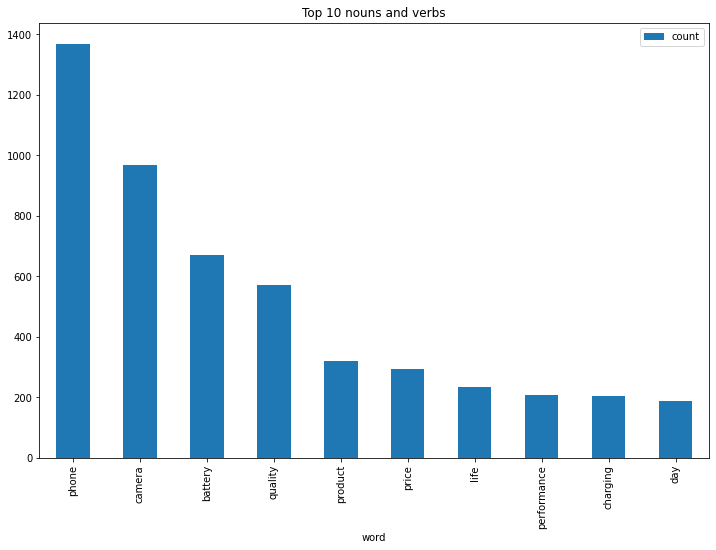

In [342]:
# Visualizing results (Barchart for top 10 nouns + verbs)
wd_df[0:10].plot.bar(x='word',figsize=(12,8),title='Top 10 nouns and verbs')

Feature Extraction

We need to convert textual representation in the form on numeric features. We have two popular techniques to perform feature 


extraction:

Bag of words (Simple vectorization)

TF-IDF (Term Frequency - Inverse Document Frequency)

We will use extracted features from both one by one to perform sentiment analysis and will compare the result at last.

Feature Extraction for 'Key Words'

In [343]:
# BOW features
bow_word_vectorizer = CountVectorizer(max_df=0.90, min_df=2, stop_words='english')
# bag-of-words feature matrix
bow_word_feature = bow_word_vectorizer.fit_transform(dataframe['Clean_Reviews'])

# TF-IDF features
tfidf_word_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, stop_words='english')
# TF-IDF feature matrix
tfidf_word_feature = tfidf_word_vectorizer.fit_transform(dataframe['Clean_Reviews'])

Fetch sentiments

To proceed further, we need to know the sentiment type of every tweet, that can be done using two ways:

a. Using NLTK's SentimentIntensityAnalyzer (We'll refer as SIA)

b. Using TextBlob

In [344]:
# 1 way
def fetch_sentiment_using_SIA(text):
    sid = SentimentIntensityAnalyzer()
    polarity_scores = sid.polarity_scores(text)
    return 'neg' if polarity_scores['neg'] > polarity_scores['pos'] else 'pos'

# 2 way
def fetch_sentiment_using_textblob(text):
    analysis = TextBlob(text)
    return 'pos' if analysis.sentiment.polarity >= 0 else 'neg'

Using NLTK's SentimentIntensityAnalyzer

In [345]:
sentiments_using_SIA = dataframe.Clean_Reviews.apply(lambda tweet: fetch_sentiment_using_SIA(tweet))
pd.DataFrame(sentiments_using_SIA.value_counts())

,Clean_Reviews
pos,2968
neg,232


In [346]:
dataframe.Clean_Reviews[8]

'good phone'

In [347]:
sid = SentimentIntensityAnalyzer()
sid.polarity_scores(dataframe.Clean_Reviews[8])

{'neg': 0.0, 'neu': 0.256, 'pos': 0.744, 'compound': 0.4404}

In [348]:
df=pd.DataFrame()
df['Review'] = dataframe.Clean_Reviews
df['scores'] = dataframe['Clean_Reviews'].apply(lambda review: sid.polarity_scores(review))
df.head()

,Review,scores
0,definitely budget branded phone month day use ...,"{'neg': 0.045, 'neu': 0.584, 'pos': 0.371, 'co..."
1,pro using oneplus last month review one plus p...,"{'neg': 0.0, 'neu': 0.656, 'pos': 0.344, 'comp..."
2,purchased gb version phone come extendable gb ...,"{'neg': 0.069, 'neu': 0.684, 'pos': 0.247, 'co..."
3,good price using hand set feel u using oppo re...,"{'neg': 0.0, 'neu': 0.594, 'pos': 0.406, 'comp..."
4,waw good mobile k purchased fully satisfied fe...,"{'neg': 0.0, 'neu': 0.556, 'pos': 0.444, 'comp..."


In [349]:
df['compound']  = df['scores'].apply(lambda scores: scores['compound'])
df.head()

,Review,scores,compound
0,definitely budget branded phone month day use ...,"{'neg': 0.045, 'neu': 0.584, 'pos': 0.371, 'co...",0.9839
1,pro using oneplus last month review one plus p...,"{'neg': 0.0, 'neu': 0.656, 'pos': 0.344, 'comp...",0.9947
2,purchased gb version phone come extendable gb ...,"{'neg': 0.069, 'neu': 0.684, 'pos': 0.247, 'co...",0.9876
3,good price using hand set feel u using oppo re...,"{'neg': 0.0, 'neu': 0.594, 'pos': 0.406, 'comp...",0.8360
4,waw good mobile k purchased fully satisfied fe...,"{'neg': 0.0, 'neu': 0.556, 'pos': 0.444, 'comp...",0.9117


In [350]:
df['sentiment'] = df['compound'].apply(lambda c: 'Positive' if c >=0.05 else ('Negative' if c<=-0.05  else 'Neutral'))
df

,Review,scores,compound,sentiment
0,definitely budget branded phone month day use ...,"{'neg': 0.045, 'neu': 0.584, 'pos': 0.371, 'co...",0.9839,Positive
1,pro using oneplus last month review one plus p...,"{'neg': 0.0, 'neu': 0.656, 'pos': 0.344, 'comp...",0.9947,Positive
2,purchased gb version phone come extendable gb ...,"{'neg': 0.069, 'neu': 0.684, 'pos': 0.247, 'co...",0.9876,Positive
3,good price using hand set feel u using oppo re...,"{'neg': 0.0, 'neu': 0.594, 'pos': 0.406, 'comp...",0.8360,Positive
4,waw good mobile k purchased fully satisfied fe...,"{'neg': 0.0, 'neu': 0.556, 'pos': 0.444, 'comp...",0.9117,Positive
...,...,...,...,...
3195,speaker volume upto mark,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral
3196,good,"{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound...",0.4404,Positive
3197,need work camera quality coming update,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral
3198,good,"{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound...",0.4404,Positive


In [351]:
from collections import defaultdict
from plotly import tools
from plotly.offline import iplot
#Filtering data
positive_review = df[df["sentiment"]=='Positive'].dropna()
neutral_review = df[df["sentiment"]=='Neutral'].dropna()
negative_review = df[df["sentiment"]=='Negative'].dropna()

## custom function for ngram generation ##
def generate_ngrams(text, n_gram = 1):
    token = [token for token in text.lower().split(" ") if token != "" if token not in STOPWORDS]
    ngrams = zip(*[token[i:] for i in range(n_gram)])
    return [" ".join(ngram) for ngram in ngrams]

# custom function for horizontal bar chart ##
def horizontal_bar_chart(df, color):
    trace = go.Bar(
        y =df["word"].values[::-1],
        x = df["wordcount"].values[::-1],
        showlegend = False,
        orientation = 'h',
        marker = dict(
            color = color,
        ),
    )
    return trace

## Get the bar chart from positive reviews ##
freq_dict = defaultdict(int)
for sent in positive_review["Review"]:
    for word in generate_ngrams(sent):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace0 = horizontal_bar_chart(fd_sorted.head(20), 'blue')


## Get the bar chart from neutral reviews ##
freq_dict = defaultdict(int)
for sent in neutral_review["Review"]:
    for word in generate_ngrams(sent):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace1 = horizontal_bar_chart(fd_sorted.head(20), 'purple')

## Get the bar chart from negative reviews ##
freq_dict = defaultdict(int)
for sent in negative_review["Review"]:
    for word in generate_ngrams(sent):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace2 = horizontal_bar_chart(fd_sorted.head(20), 'yellow')

# Creating two subplots
fig = tools.make_subplots(rows=3, cols=1, vertical_spacing = 0.04,
                          subplot_titles=["Frequent words of positive reviews", "Frequent words of neutral reviews",
                                          "Frequent words of negative reviews"])
fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 2, 1)
fig.append_trace(trace2, 3, 1)
fig['layout'].update(height=1200, width=900, paper_bgcolor='rgb(233,233,233)', title="Word Count Plots")
iplot(fig, filename='word-plots')

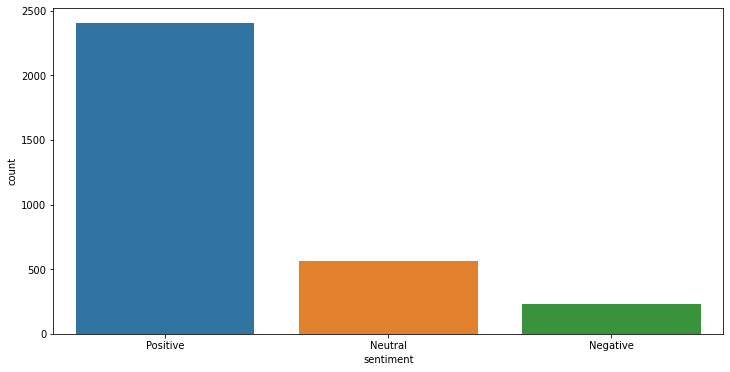

In [353]:
plt.figure(figsize=(12,6))
sns.countplot(x='sentiment',data=df)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



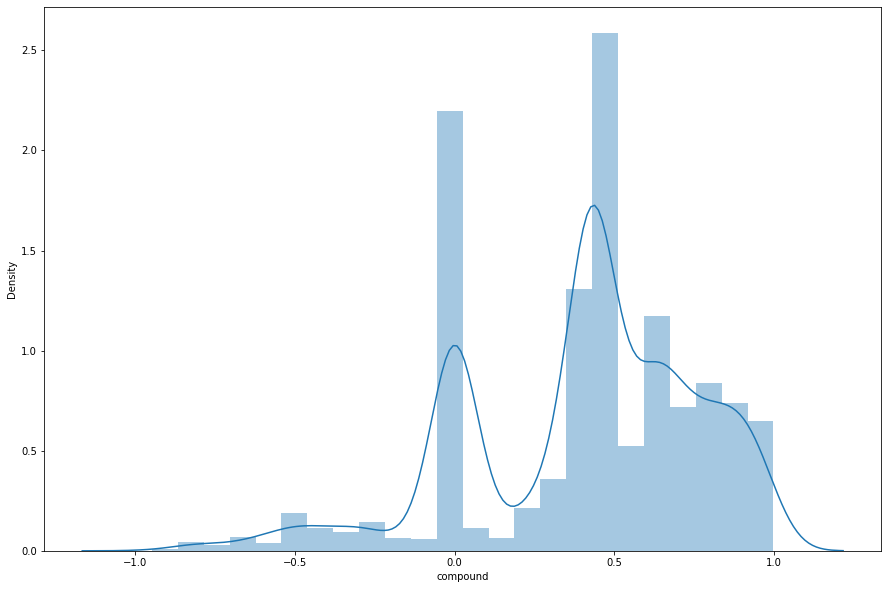

In [354]:
# Plotting the sentiment value for whole review
import seaborn as sns
plt.figure(figsize=(15,10))
sns.distplot(df['compound'])

Using TextBlob

In [357]:
sentiments_using_textblob = dataframe.Clean_Reviews.apply(lambda tweet: fetch_sentiment_using_textblob(tweet))
pd.DataFrame(sentiments_using_textblob.value_counts())

,Clean_Reviews
pos,3012
neg,188


In [358]:
 # let's calculate subjectivity and Polarity
# function for subjectivity
def calc_subj(text):
    return TextBlob(text).sentiment.subjectivity
 
# function for Polarity
def calc_pola(text):
    return TextBlob(text).sentiment.polarity
 
dataframe['Subjectivity'] = dataframe.Clean_Reviews.apply(calc_subj)
dataframe['Polarity'] = dataframe.Clean_Reviews.apply(calc_pola)
dataframe.head()

,Clean_Reviews,Uncleaned_Reviews,Subjectivity,Polarity
0,definitely budget branded phone month day use ...,This is definitely a budget branded phone 📱 af...,0.685863,0.219395
1,pro using oneplus last month review one plus p...,Pros......I am using OnePlus from last few mon...,0.539844,0.348864
2,purchased gb version phone come extendable gb ...,I've purchased the 6GB version of this phone w...,0.486111,0.180556
3,good price using hand set feel u using oppo re...,Good at this price. Using hand set will feel u...,0.525000,0.300000
4,waw good mobile k purchased fully satisfied fe...,Waw this is good mobile is under 20K. I have p...,0.528571,0.014286


Text(0, 0.5, 'Subjectivity')

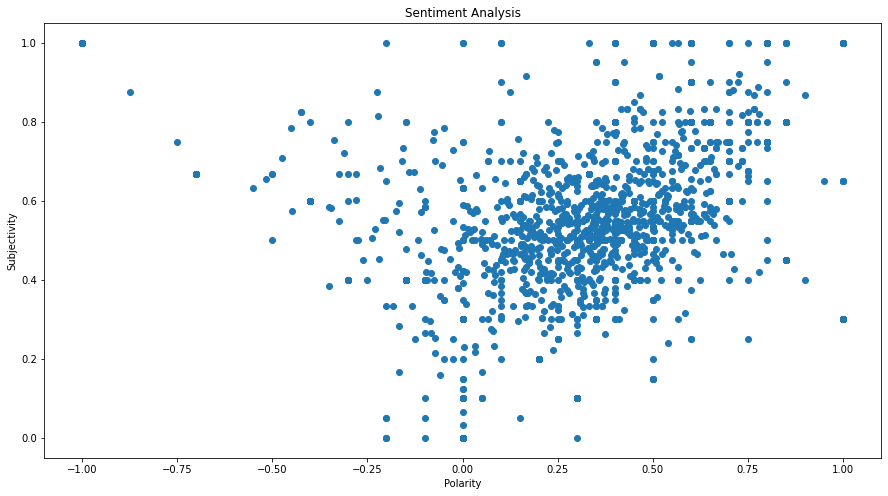

In [359]:
f, axes = plt.subplots(figsize = (15,8))
plt.scatter(dataframe.Polarity, dataframe.Subjectivity)
plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')

In [360]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings("ignore")


type_ = ["Positive", "Neutral", "Negative"]
fig = make_subplots(rows=1, cols=1)

fig.add_trace(go.Pie(labels=type_, values=df['sentiment'].value_counts(), name="sentiment"))

# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.4, hoverinfo="label+percent+name", textfont_size=16)

fig.update_layout(
    title_text="Sentiment Analysis",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='Sentiment', x=0.5, y=0.5, font_size=20, showarrow=False)])
fig.show()

NLTK gives us more negative sentiments than TexBlob, so we will prefer NLTK, since classfication seems better.

In [361]:
dataframe['sentiment'] = sentiments_using_SIA
dataframe.to_csv("clean_review.csv",index=False)
dataframe.head()

,Clean_Reviews,Uncleaned_Reviews,Subjectivity,Polarity,sentiment
0,definitely budget branded phone month day use ...,This is definitely a budget branded phone 📱 af...,0.685863,0.219395,pos
1,pro using oneplus last month review one plus p...,Pros......I am using OnePlus from last few mon...,0.539844,0.348864,pos
2,purchased gb version phone come extendable gb ...,I've purchased the 6GB version of this phone w...,0.486111,0.180556,pos
3,good price using hand set feel u using oppo re...,Good at this price. Using hand set will feel u...,0.525000,0.300000,pos
4,waw good mobile k purchased fully satisfied fe...,Waw this is good mobile is under 20K. I have p...,0.528571,0.014286,pos


Story Generation and Visualization

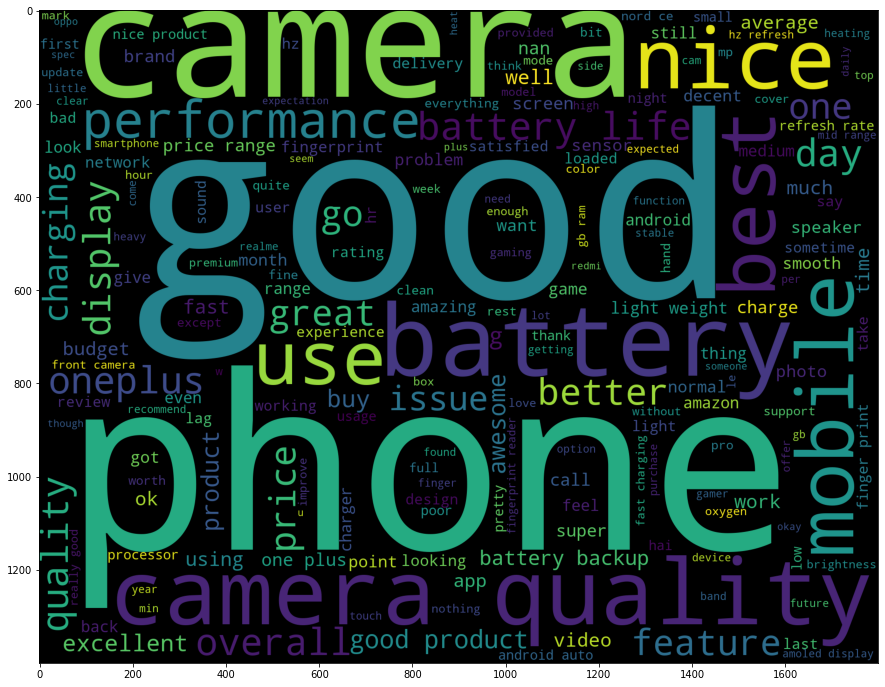

In [362]:
allWords_ = ' '.join([review for review in dataframe[:500]['Clean_Reviews']])
f, axes = plt.subplots(figsize=(20,12))
wordcloud= WordCloud(
        background_color = 'black',
        width = 1800,
        height =1400).generate(allWords_)
plt.imshow(wordcloud)

Most common words in positive Review

In [363]:
def generate_wordcloud(all_words):
    wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=100, relative_scaling=0.5, colormap='Dark2').generate(all_words)

    plt.figure(figsize=(14, 10))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.show()

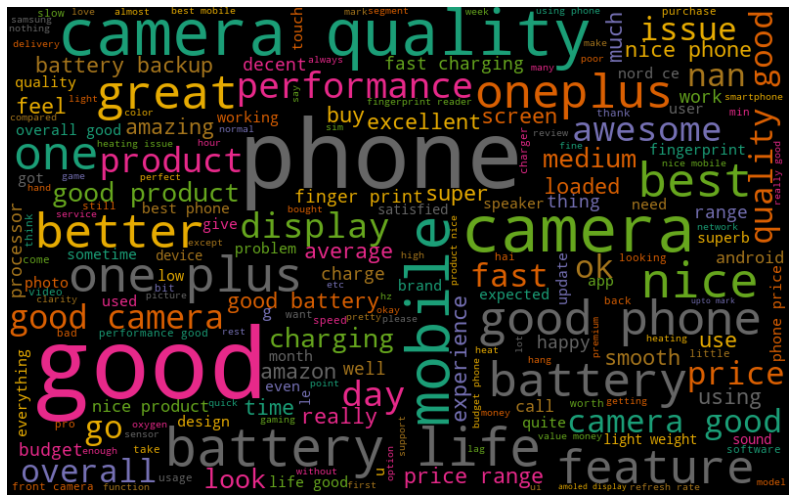

In [364]:
all_words = ' '.join([text for text in dataframe['Clean_Reviews'][dataframe.sentiment == 'pos']])
generate_wordcloud(all_words)

Most common words in negative Review

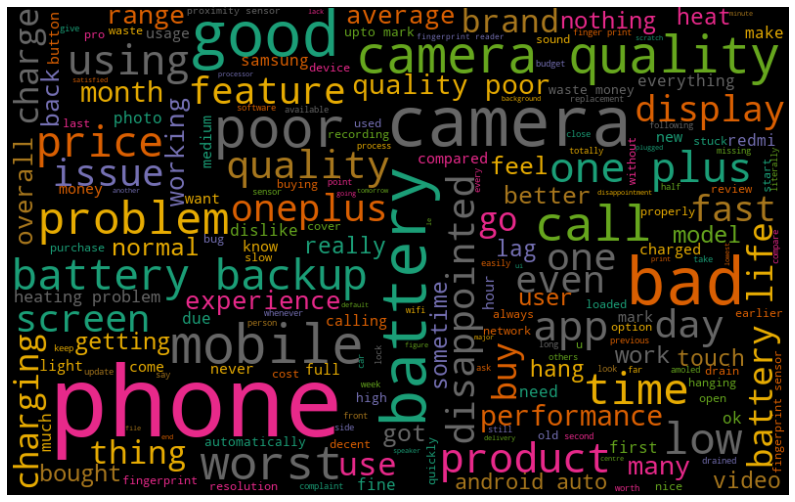

In [365]:
all_words = ' '.join([text for text in dataframe['Clean_Reviews'][dataframe.sentiment == 'neg']])
generate_wordcloud(all_words)